<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary" data-toc-modified-id="Preliminary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Fonctions</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Scoring-RFM" data-toc-modified-id="Scoring-RFM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Scoring RFM</a></span></li><li><span><a href="#(Copier-coller-test!)-:-A-refaire-=>-pour-la-démonstration" data-toc-modified-id="(Copier-coller-test!)-:-A-refaire-=>-pour-la-démonstration-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>(Copier coller test!) : A refaire =&gt; pour la démonstration</a></span></li><li><span><a href="#Biensur-a-modifier,-puis-faire-la-classification" data-toc-modified-id="Biensur-a-modifier,-puis-faire-la-classification-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Biensur a modifier, puis faire la classification</a></span></li><li><span><a href="#K-means" data-toc-modified-id="K-means-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>K-means</a></span></li></ul></li></ul></div>

# Preliminary

## Context

**Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.**

**Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.**

**Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.**

## Imports

In [13]:
# Builtin
import os
print(os.getcwd())

# Data
import numpy as np
import pandas as pd

# Visualisation
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
import sklearn

print("Numpy : {}".format(np.__version__))
print("Pandas : {}".format(pd.__version__))
print("Missingno Version : {}".format(msno.__version__))
print("Matplotlib Version : {}".format(matplotlib.__version__))
print("Seaborn Version : {}".format(sns.__version__))
print("Scikit-Learn Version : {}".format(sklearn.__version__))

C:\Users\Trunky\OPC - P4
Numpy : 1.21.5
Pandas : 1.4.4
Missingno Version : 0.4.2
Matplotlib Version : 3.5.2
Seaborn Version : 0.11.2
Scikit-Learn Version : 1.0.2


## Fonctions

In [14]:
def shape(df):
    """
    Analyzes the shape of the dataframe: 1) Open it, give some infos 2) Nan values 3) Describe method
    """

    # Head & tail
    df_combined = pd.concat([df.head(), df.tail()], axis=0)
    display(df_combined)
    print("\nNumber of Rows: ", df.shape[0])
    print("Number of Columns: ", df.shape[1])

    print("\nInfo:")
    print(df.info())
    for col in df.columns:
            print("\nUnique values in {}:".format(col))
            print(df[col].unique())

    # N_unique values
    nunique_dict = {col: df[col].nunique() for col in df.columns}
    nunique_df = pd.DataFrame.from_dict(nunique_dict, orient='index', columns=['N_unique values'])
    display(nunique_df)

    # Value counts and missing/duplicated data
    if 'type' in df.columns:
        print("\nValue counts of 'type':")
        print(df['type'].value_counts())
    else:
        print("\n'type' column not found in dataframe.")
    print("\nNumber of missing values:")
    print(df.isna().sum())
    print("\nNumber of duplicated rows:")
    print(df.duplicated().sum())

    # MissingNo
    print("\nMissingNo:")
    print(msno.matrix(df.sample(100, replace = True)))

## Data

In [15]:
# Data acces
path = path = "C:\\Users\\Trunky\\OPC - P4"

In [16]:
df_grouped = pd.read_csv(os.path.join(path, "df_grouped.csv"))
rfm_2016_2018 = pd.read_csv(os.path.join(path, "rfm_2016_2018.csv"))
rfm_2016_2017 = pd.read_csv(os.path.join(path, "rfm_2016_2017.csv"))
rfm_2017_2018 = pd.read_csv(os.path.join(path, "rfm_2017_2018.csv"))

,Unnamed: 0,customer_unique_id,order_count,order_purchase_timestamp,avg_products_per_order,total_spent,review_score,recency,payment_type,same_state
0,0,0000366f3b9a7992bf8c76cfdf3221e2,1,2018-05-10 10:56:27,1.0,141.90,5.0,160,1,1
1,1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,2018-05-07 11:11:27,1.0,27.19,4.0,163,1,1
2,2,0000f46a3911fa3c0805444483337064,1,2017-03-10 21:05:03,1.0,86.22,3.0,585,1,0
3,3,0000f6ccb0745a6a4b88665a16c9f078,1,2017-10-12 20:29:41,1.0,43.62,4.0,369,1,0
4,4,0004aac84e0df4da2b147fca70cf8255,1,2017-11-14 19:45:42,1.0,196.89,5.0,336,1,1
95375,95375,fffcf5a5ff07b0908bd4e2dbc735a684,2,2017-06-08 21:00:36,2.0,4134.84,5.0,495,1,0
95376,95376,fffea47cd6d3cc0a88bd621562a9d061,1,2017-12-10 20:07:56,1.0,84.58,4.0,310,1,0
95377,95377,ffff371b4d645b6ecea244b27531430a,1,2017-02-07 15:49:16,1.0,112.46,5.0,617,1,0
95378,95378,ffff5962728ec6157033ef9805bacc48,1,2018-05-02 15:17:41,1.0,133.69,5.0,168,1,0
95379,95379,ffffd2657e2aad2907e67c3e9daecbeb,1,2017-05-02 20:18:45,1.0,71.56,5.0,532,1,0



Number of Rows:  95380
Number of Columns:  10

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95380 entries, 0 to 95379
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                95380 non-null  int64  
 1   customer_unique_id        95380 non-null  object 
 2   order_count               95380 non-null  int64  
 3   order_purchase_timestamp  95380 non-null  object 
 4   avg_products_per_order    95380 non-null  float64
 5   total_spent               95380 non-null  float64
 6   review_score              95380 non-null  float64
 7   recency                   95380 non-null  int64  
 8   payment_type              95380 non-null  int64  
 9   same_state                95380 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 7.3+ MB
None

Unique values in Unnamed: 0:
[    0     1     2 ... 95377 95378 95379]

Unique values in customer_unique_id:


,N_unique values
Unnamed: 0,95380
customer_unique_id,95380
order_count,28
order_purchase_timestamp,95121
avg_products_per_order,58
total_spent,30577
review_score,66
recency,630
payment_type,4
same_state,2



'type' column not found in dataframe.

Number of missing values:
Unnamed: 0                  0
customer_unique_id          0
order_count                 0
order_purchase_timestamp    0
avg_products_per_order      0
total_spent                 0
review_score                0
recency                     0
payment_type                0
same_state                  0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


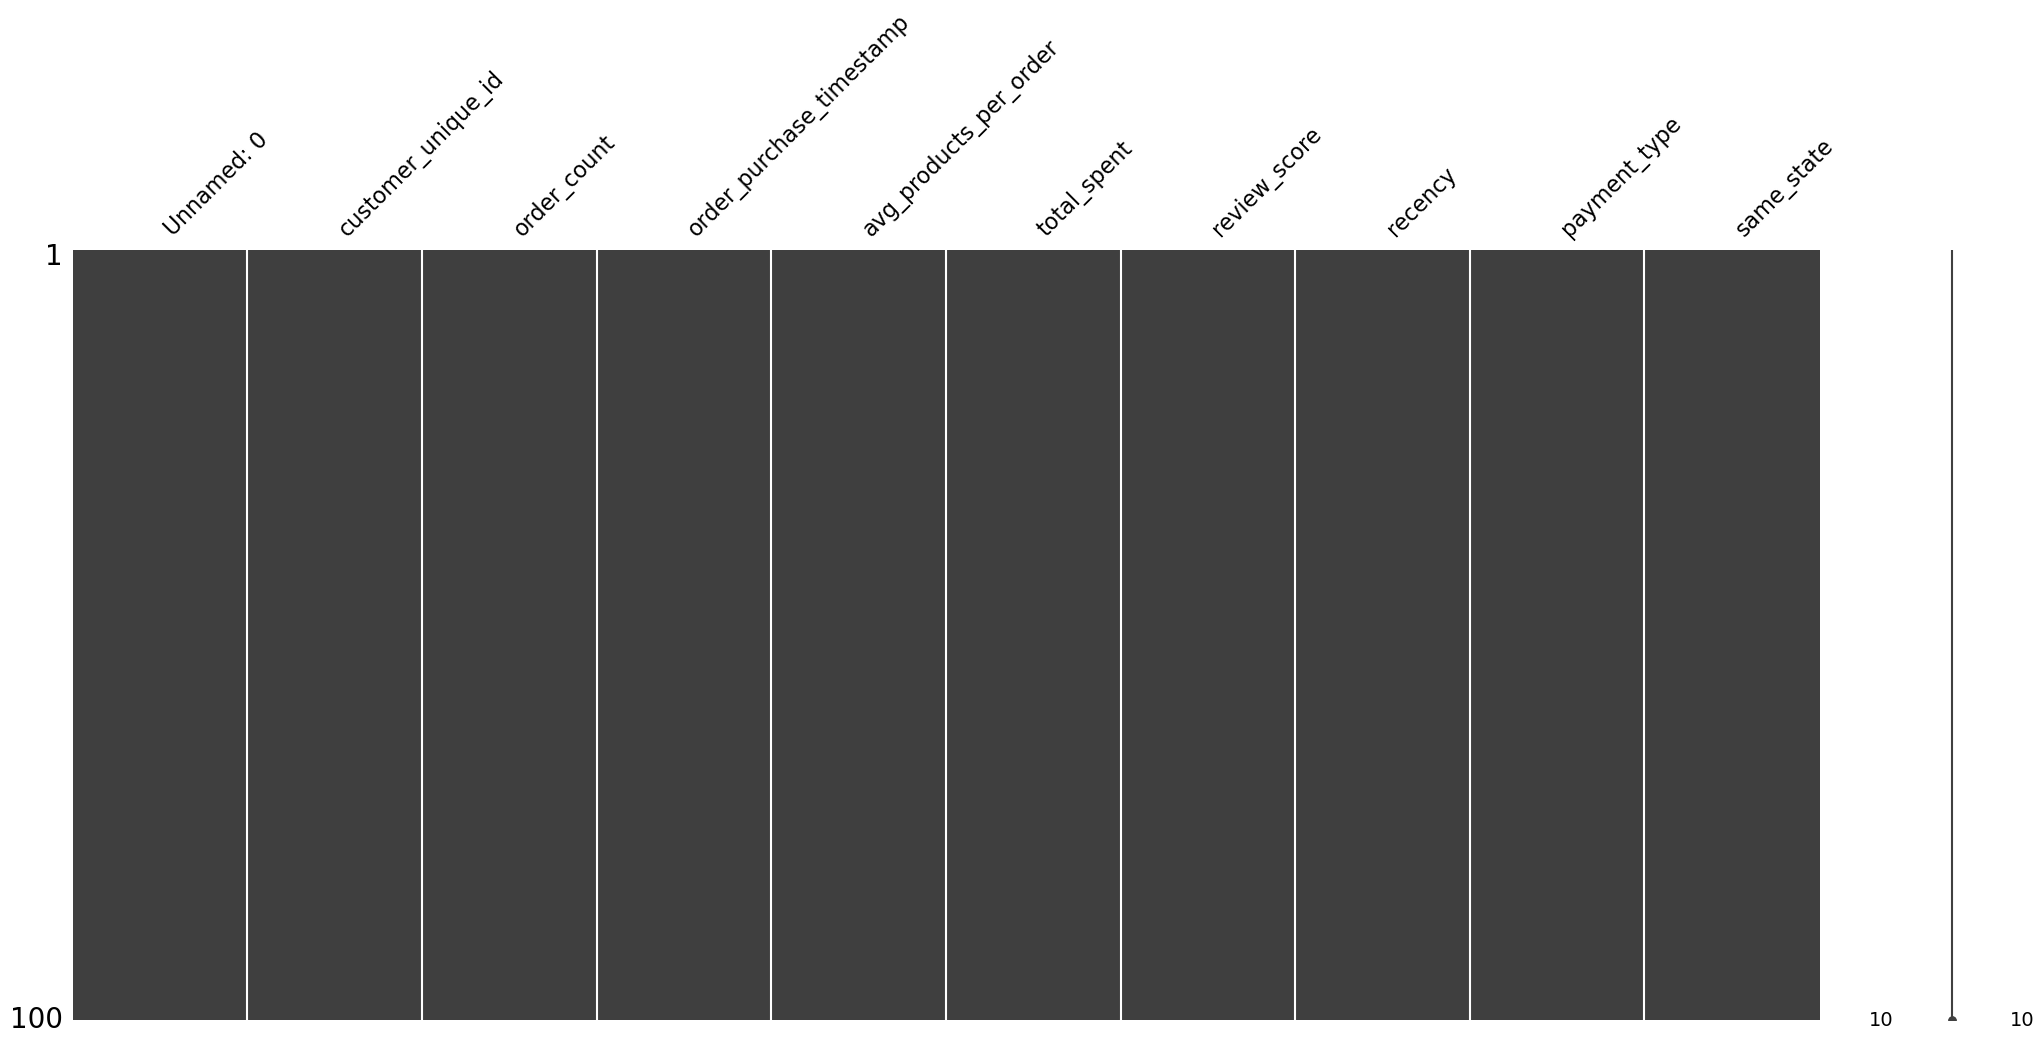

In [17]:
shape(df_grouped)

,Unnamed: 0,recency,frequency,monetary,order_purchase_timestamp
0,0,160,1,141.90,2018-05-10 10:56:27
1,1,163,1,27.19,2018-05-07 11:11:27
2,2,585,1,86.22,2017-03-10 21:05:03
3,3,369,1,43.62,2017-10-12 20:29:41
4,4,336,1,196.89,2017-11-14 19:45:42
95374,95375,495,2,4134.84,2017-06-08 21:00:36
95375,95376,310,1,84.58,2017-12-10 20:07:56
95376,95377,617,1,112.46,2017-02-07 15:49:16
95377,95378,168,1,133.69,2018-05-02 15:17:41
95378,95379,532,1,71.56,2017-05-02 20:18:45



Number of Rows:  95379
Number of Columns:  5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95379 entries, 0 to 95378
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                95379 non-null  int64  
 1   recency                   95379 non-null  int64  
 2   frequency                 95379 non-null  int64  
 3   monetary                  95379 non-null  float64
 4   order_purchase_timestamp  95379 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 3.6+ MB
None

Unique values in Unnamed: 0:
[    0     1     2 ... 95377 95378 95379]

Unique values in recency:
[160 163 585 369 336 194 180 231 591 219 456 332 207 177 432 383 308 282
 425 114  57 150  83 463 226 412 633 541 476 438 365 271  75  65 546 426
  53  81 236 248 169 474  97 149 313 117 576 570 112 202  69 137  85 206
 283 355 349 232 373 623 315 350 274 512 188 452 260 244 353 414  95 

,N_unique values
Unnamed: 0,95379
recency,630
frequency,28
monetary,30576
order_purchase_timestamp,95120



'type' column not found in dataframe.

Number of missing values:
Unnamed: 0                  0
recency                     0
frequency                   0
monetary                    0
order_purchase_timestamp    0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


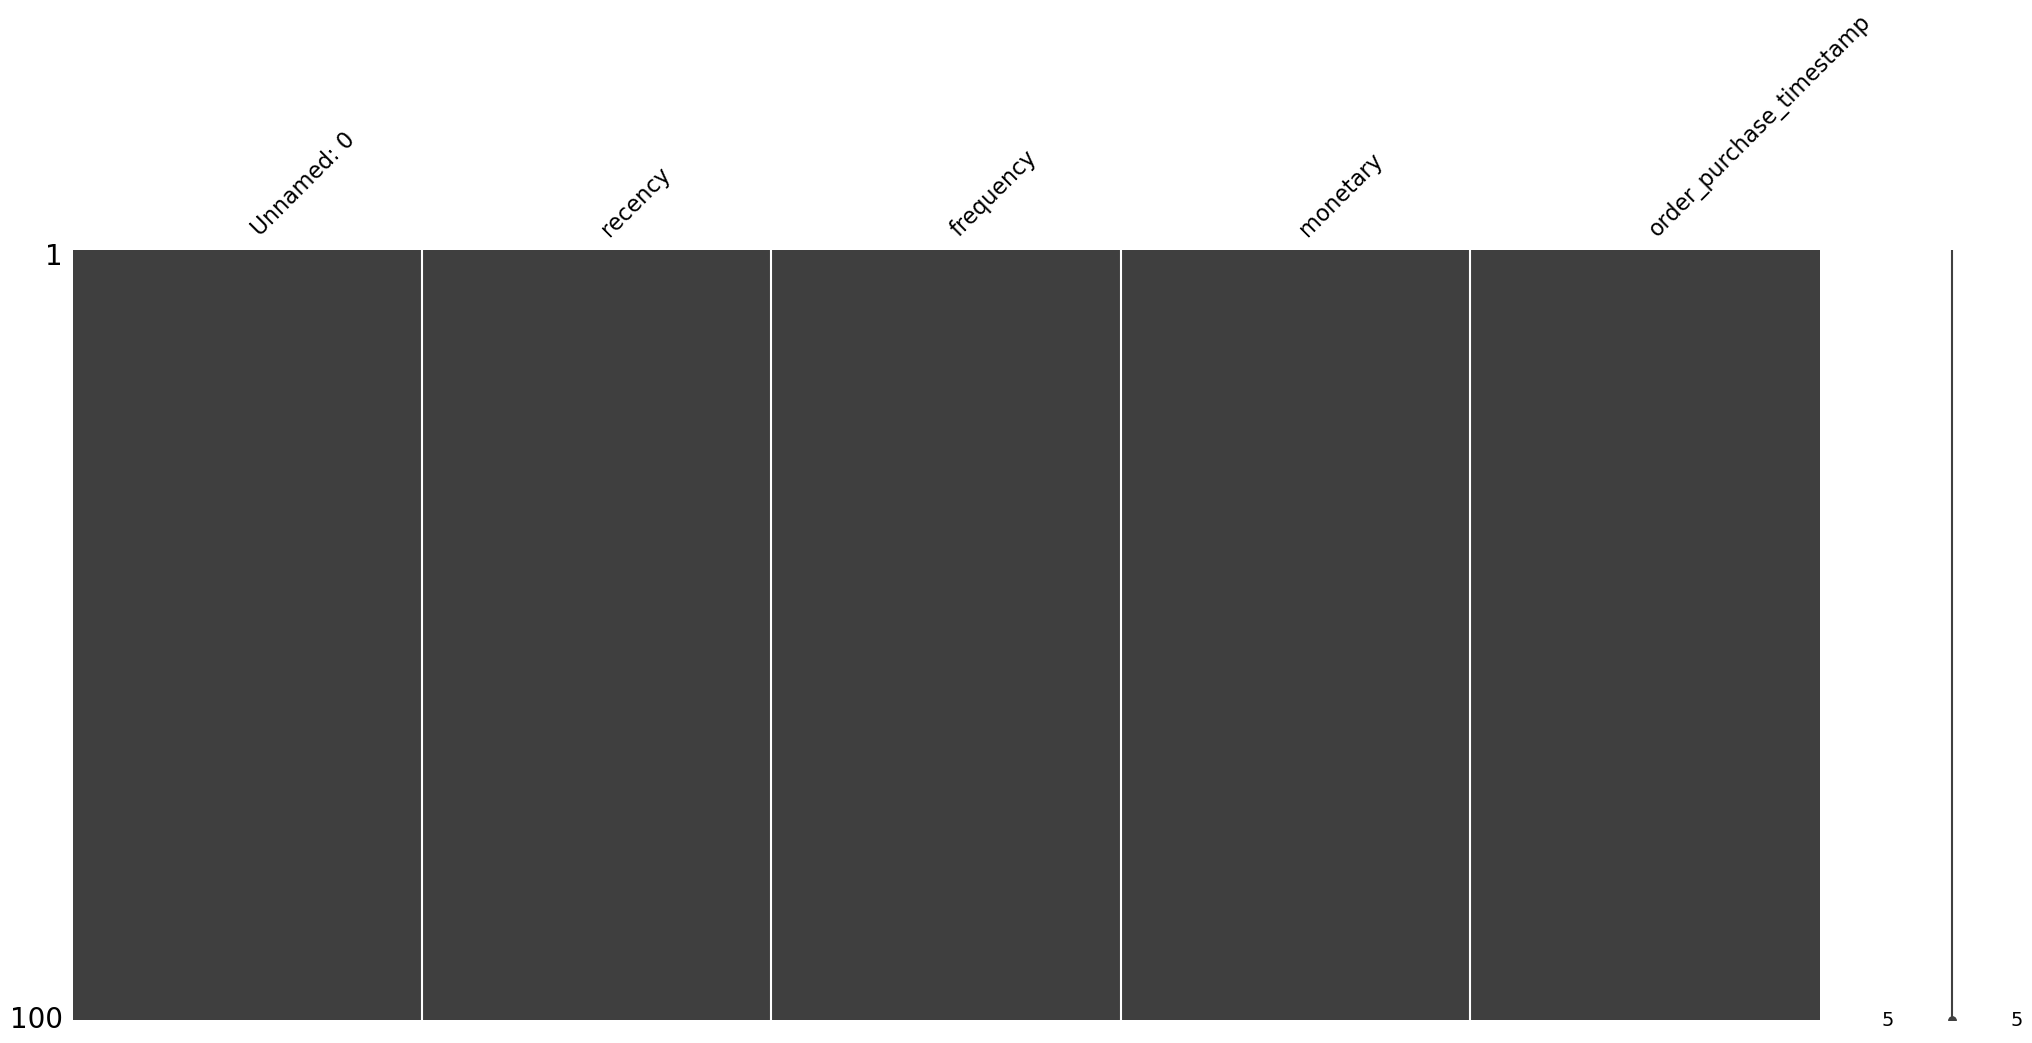

In [18]:
shape(rfm_2016_2018)

,Unnamed: 0,recency,frequency,monetary,order_purchase_timestamp
0,2,585,1,86.22,2017-03-10 21:05:03
1,8,591,1,150.12,2017-03-04 23:32:12
2,10,456,1,29.00,2017-07-18 09:23:10
3,14,432,1,91.28,2017-08-11 13:45:15
4,18,425,2,514.88,2017-08-17 19:10:33
22240,95365,432,1,102.74,2017-08-11 10:26:38
22241,95368,411,1,55.00,2017-09-01 17:06:54
22242,95375,495,2,4134.84,2017-06-08 21:00:36
22243,95377,617,1,112.46,2017-02-07 15:49:16
22244,95379,532,1,71.56,2017-05-02 20:18:45



Number of Rows:  22245
Number of Columns:  5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                22245 non-null  int64  
 1   recency                   22245 non-null  int64  
 2   frequency                 22245 non-null  int64  
 3   monetary                  22245 non-null  float64
 4   order_purchase_timestamp  22245 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 869.1+ KB
None

Unique values in Unnamed: 0:
[    2     8    10 ... 95375 95377 95379]

Unique values in recency:
[585 591 456 432 425 463 412 633 541 476 438 546 426 474 576 570 623 512
 452 414 482 741 523 434 569 461 583 545 495 589 441 415 490 436 564 593
 491 408 409 442 433 445 549 559 454 607 420 629 503 481 567 483 581 446
 547 764 485 595 467 553 537 568 488 462 579 578 574 572 477 487 48

,N_unique values
Unnamed: 0,22245
recency,256
frequency,21
monetary,10872
order_purchase_timestamp,22223



'type' column not found in dataframe.

Number of missing values:
Unnamed: 0                  0
recency                     0
frequency                   0
monetary                    0
order_purchase_timestamp    0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


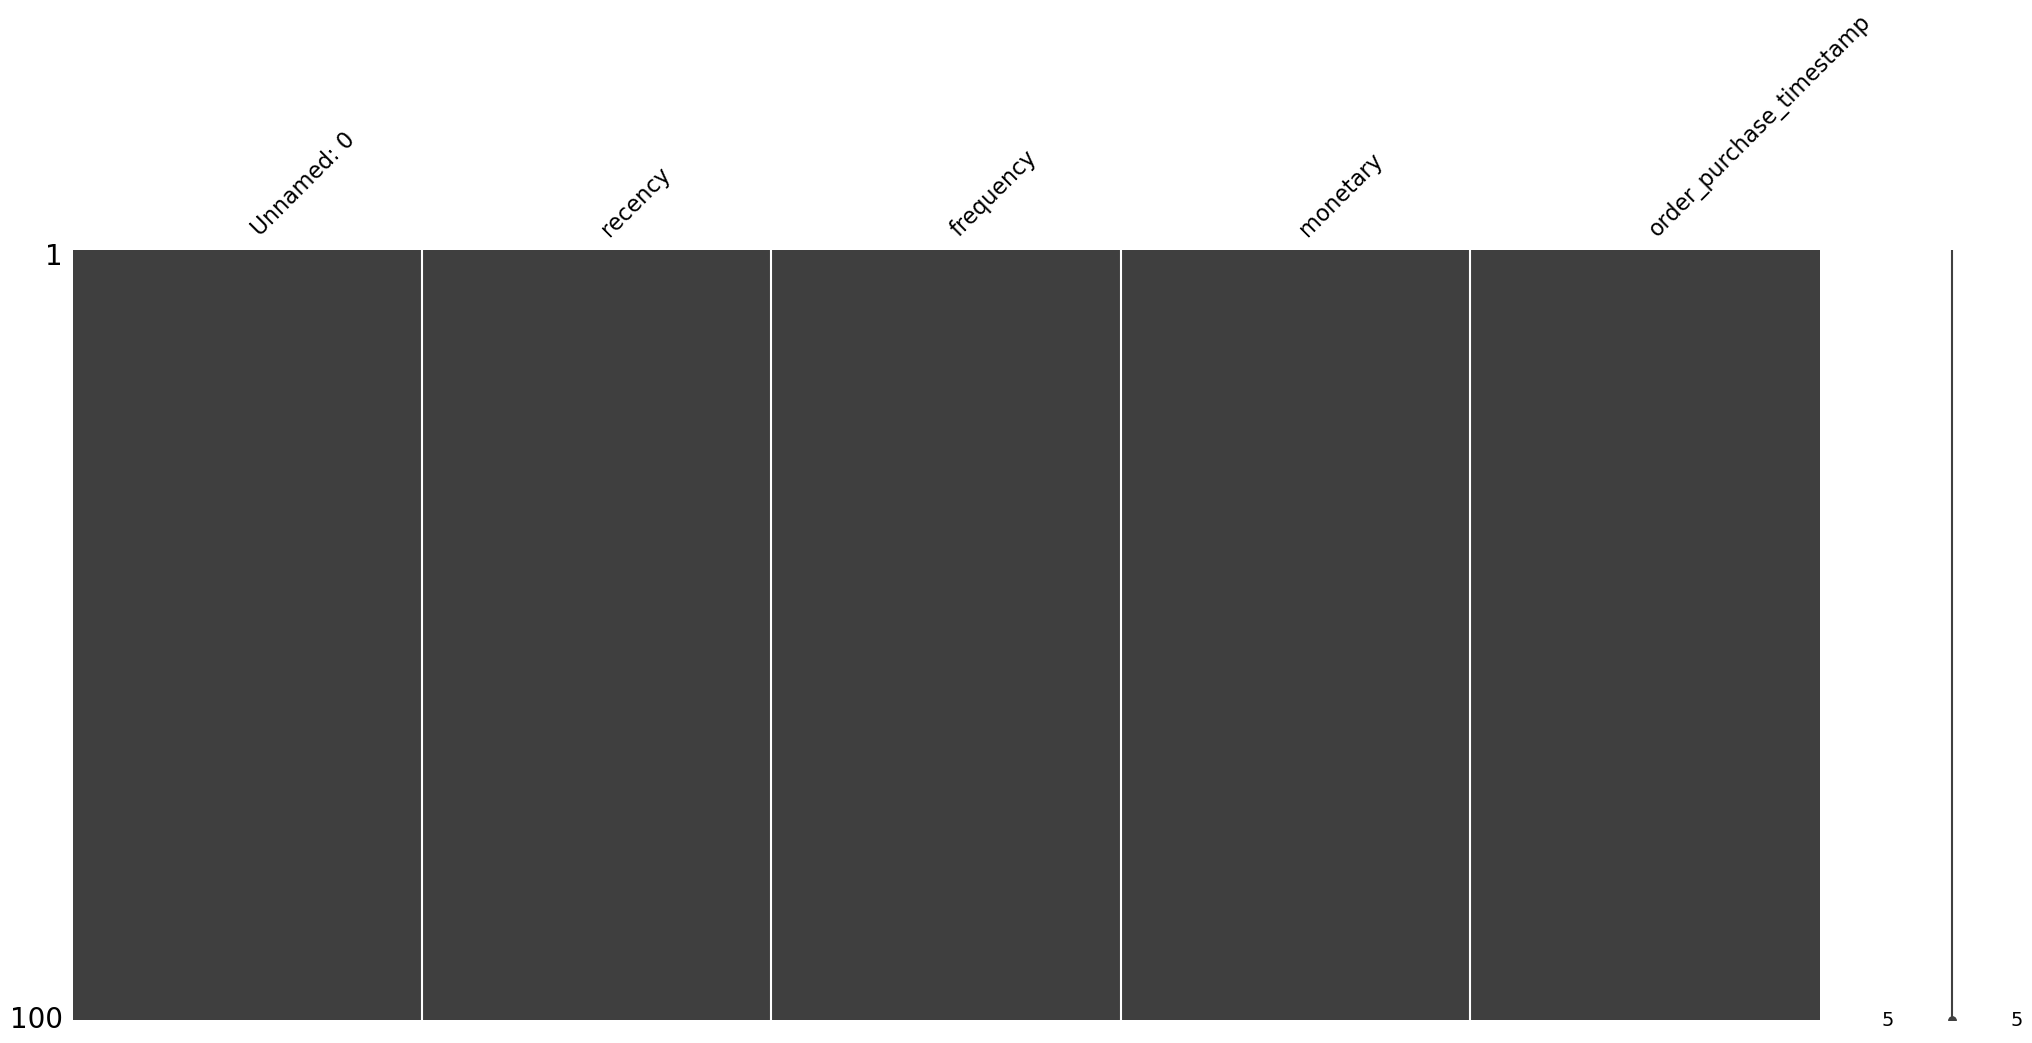

In [19]:
shape(rfm_2016_2017)

,Unnamed: 0,recency,frequency,monetary,order_purchase_timestamp
0,0,160,1,141.90,2018-05-10 10:56:27
1,1,163,1,27.19,2018-05-07 11:11:27
2,3,369,1,43.62,2017-10-12 20:29:41
3,4,336,1,196.89,2017-11-14 19:45:42
4,5,194,1,166.98,2018-04-05 19:33:16
73116,95372,303,1,73.16,2017-12-17 19:14:35
73117,95373,293,1,167.32,2017-12-27 22:36:41
73118,95374,189,1,710.70,2018-04-11 00:34:32
73119,95376,310,1,84.58,2017-12-10 20:07:56
73120,95378,168,1,133.69,2018-05-02 15:17:41



Number of Rows:  73121
Number of Columns:  5

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73121 entries, 0 to 73120
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                73121 non-null  int64  
 1   recency                   73121 non-null  int64  
 2   frequency                 73121 non-null  int64  
 3   monetary                  73121 non-null  float64
 4   order_purchase_timestamp  73121 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 2.8+ MB
None

Unique values in Unnamed: 0:
[    0     1     3 ... 95374 95376 95378]

Unique values in recency:
[160 163 369 336 194 180 231 219 332 207 177 383 308 282 114  57 150  83
 226 365 271  75  65  53  81 236 248 169  97 149 313 117 112 202  69 137
  85 206 283 355 349 232 373 315 350 274 188 260 244 353  95  93 113 100
 158 273 259 261 326 264 198  72  84  64 214  63 285 320 168 183 331 

,N_unique values
Unnamed: 0,73121
recency,363
frequency,23
monetary,26108
order_purchase_timestamp,72884



'type' column not found in dataframe.

Number of missing values:
Unnamed: 0                  0
recency                     0
frequency                   0
monetary                    0
order_purchase_timestamp    0
dtype: int64

Number of duplicated rows:
0

MissingNo:
AxesSubplot(0.125,0.11;0.698618x0.77)


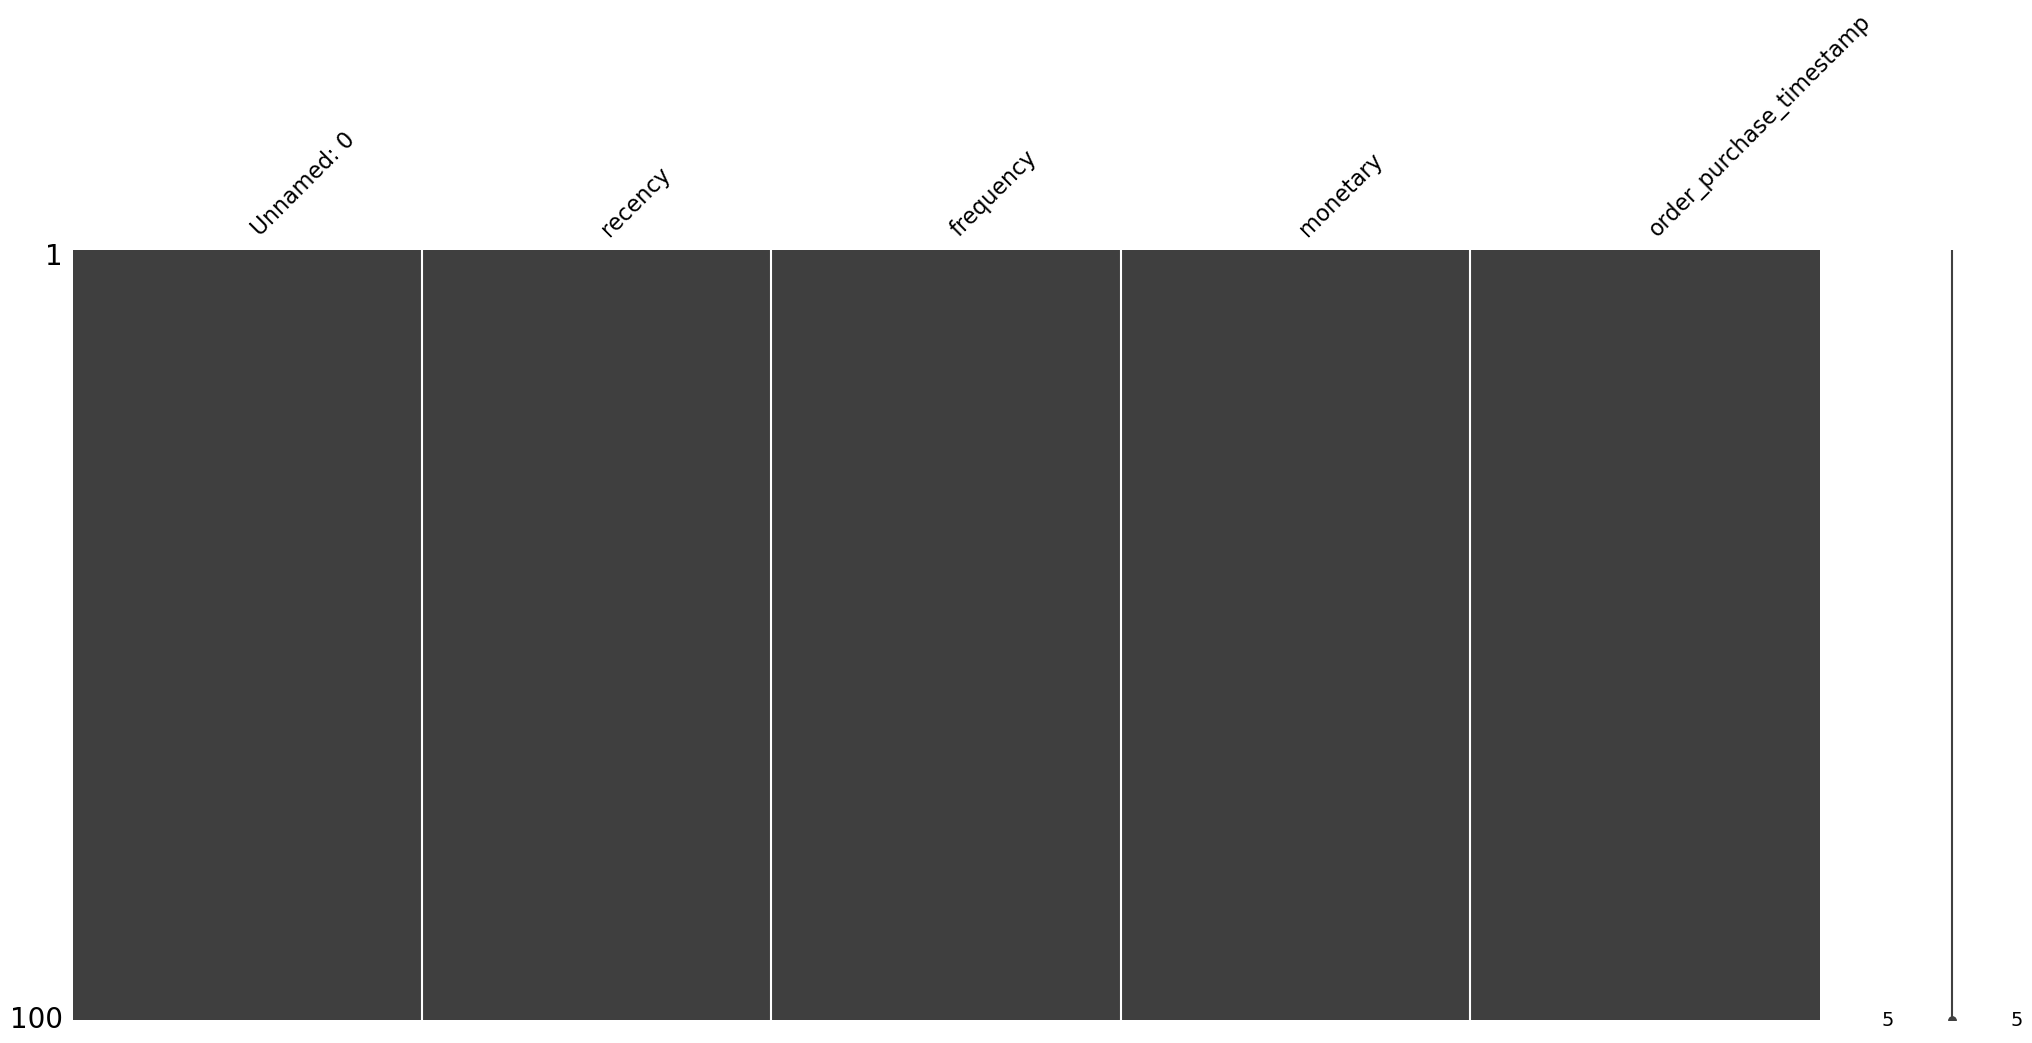

In [20]:
shape(rfm_2017_2018)

# Clustering 

## Scoring RFM

In [21]:
#Deleting date column because it's not necessary
rfm_2016_2018.drop(columns='order_purchase_timestamp', inplace = True)
rfm_2016_2018.head()

,Unnamed: 0,recency,frequency,monetary
0,0,160,1,141.90
1,1,163,1,27.19
2,2,585,1,86.22
3,3,369,1,43.62
4,4,336,1,196.89


## (Copier coller test!) : A refaire => pour la démonstration 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

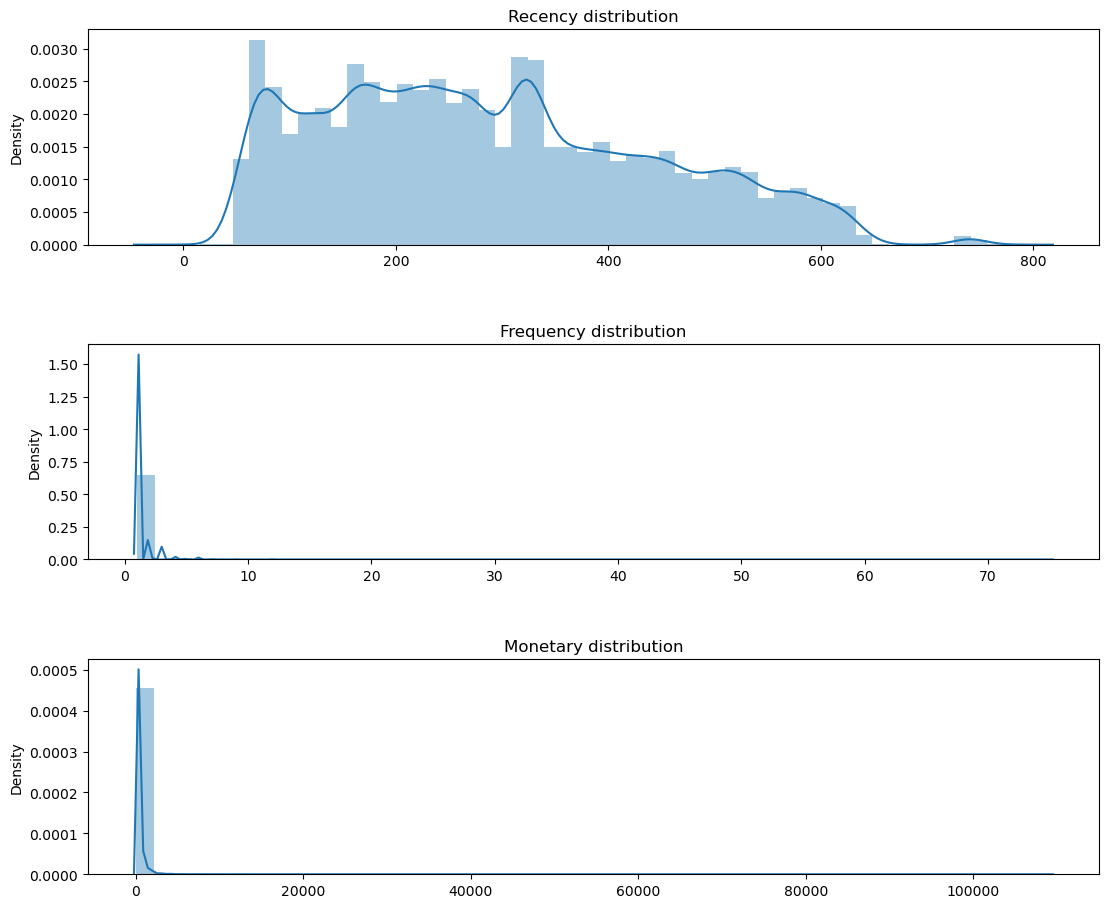

In [22]:
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_2016_2018['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_2016_2018['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_2016_2018['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


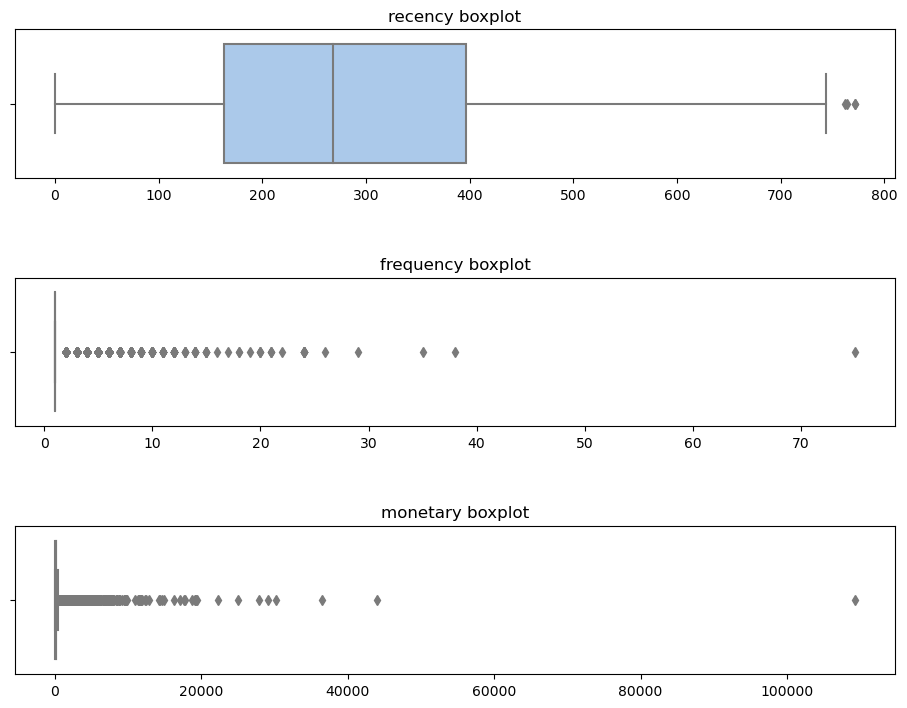

In [24]:
#Columns to examine
features = ['recency', 'frequency', 'monetary']

#Creating a boxplot for outlier detection
n = 1

plt.figure(figsize = (10, 8))

for feature in features:
    plt.subplot(3,1,n)
    sns.boxplot(rfm_2016_2018[feature], palette = 'pastel').set(xlabel = None)
    plt.title(f'{feature} boxplot')
    n = n + 1
    
plt.tight_layout(pad = 4)

In [25]:
#Create function to detele extreme outliers
# Source : https://www.kaggle.com/code/marta99/olist-e-commerce-eda-and-rfm-analysis

def remove_outlier(input_df, colum_name):
    q1 = input_df[colum_name].quantile(0.05)
    q3 = input_df[colum_name].quantile(0.95)
    iqr = q3-q1     
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    index_outliers = input_df.loc[(input_df[colum_name] < fence_low) | (input_df[colum_name] > fence_high)].index
    input_df = pd.DataFrame(input_df.drop(index_outliers.to_list(), axis=0, inplace=True))
    return input_df

In [26]:
#Apply the function to the columns, except frequency column
for i in ["recency", "monetary"]:
    remove_outlier(rfm_2016_2018, i)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

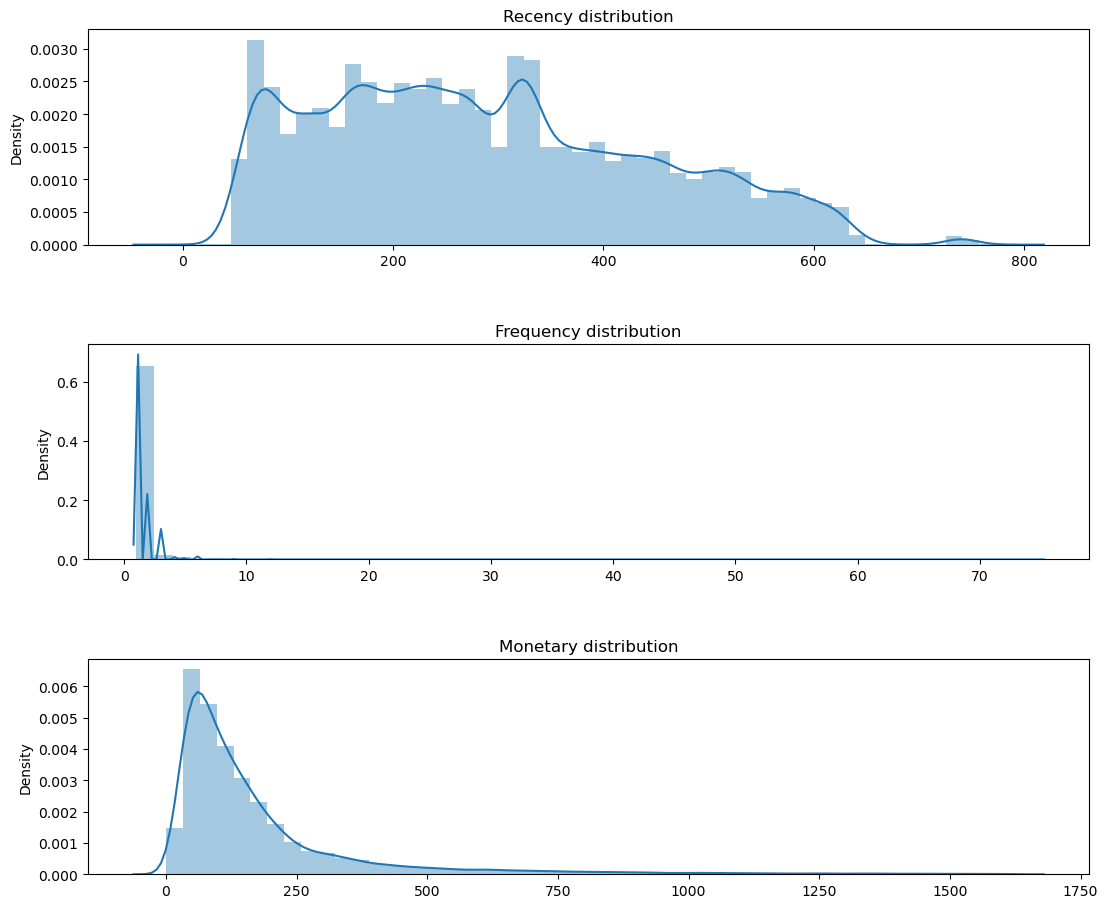

In [27]:
#Distribution plots after eliminating extreme outliers
plt.figure(figsize=(12, 10))

#Recency
plt.subplot(3, 1, 1)
sns.distplot(rfm_2016_2018['recency'])
plt.title('Recency distribution')
plt.xlabel(None)

#Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfm_2016_2018['frequency'])
plt.title('Frequency distribution')
plt.xlabel(None)

#Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfm_2016_2018['monetary'])
plt.title('Monetary distribution')
plt.xlabel(None)

plt.tight_layout(pad = 4)


In [29]:
#Using qcut function to discretize variables into equal-sized buckets
rfm_2016_2018["recency_score"] = pd.qcut(rfm_2016_2018['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_2016_2018["monetary_score"] = pd.qcut(rfm_2016_2018['monetary'], 5, labels=[1, 2, 3, 4, 5])

In [30]:
rfm_2016_2018['frequency'].value_counts(normalize=True)*100

1     85.593104
2     10.940631
3      2.006171
4      0.860999
5      0.234336
6      0.198284
7      0.049836
8      0.031810
9      0.020147
12     0.012724
10     0.011664
11     0.010603
13     0.004241
24     0.004241
14     0.004241
15     0.003181
20     0.002121
19     0.001060
22     0.001060
26     0.001060
16     0.001060
18     0.001060
38     0.001060
29     0.001060
17     0.001060
21     0.001060
75     0.001060
35     0.001060
Name: frequency, dtype: float64

In [32]:
#Creating a function to parse values
# Source : https://www.kaggle.com/code/marta99/olist-e-commerce-eda-and-rfm-analysis

def parse_values(x):
    switch = {
        1: 1,
        2: 2,
        3: 3,
        4: 4
    }
    return switch.get(x, 5)

In [33]:
#Apply function to create frequency_score column
rfm_2016_2018['frequency_score'] = rfm_2016_2018['frequency'].apply(parse_values)

In [34]:
#Concatenate all scores into one
rfm_2016_2018['rfm_score'] = rfm_2016_2018.recency_score.astype(str)+ rfm_2016_2018.frequency_score.astype(str) + rfm_2016_2018.monetary_score.astype(str)

#Show results
rfm_2016_2018.head()

,Unnamed: 0,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
0,0,160,1,141.90,4,4,1,414
1,1,163,1,27.19,4,1,1,411
2,2,585,1,86.22,1,2,1,112
3,3,369,1,43.62,2,1,1,211
4,4,336,1,196.89,2,4,1,214


## Biensur a modifier, puis faire la classification

## K-means

In [44]:
rfm_2016_2018.head()

,Unnamed: 0,recency,frequency,monetary,recency_score,monetary_score,frequency_score,rfm_score
0,0,160,1,141.90,4,4,1,414
1,1,163,1,27.19,4,1,1,411
2,2,585,1,86.22,1,2,1,112
3,3,369,1,43.62,2,1,1,211
4,4,336,1,196.89,2,4,1,214


In [45]:
rfm_2016_2018.drop(columns=['Unnamed: 0','recency_score','monetary_score','frequency_score','rfm_score'], inplace = True)

In [46]:
rfm_2016_2018.head()

,recency,frequency,monetary
0,160,1,141.90
1,163,1,27.19
2,585,1,86.22
3,369,1,43.62
4,336,1,196.89


In [62]:
kmeans = myclust.fit(rfm_2016_2018)

In [ ]:
from sklearn import cluster

myclust = cluster.KMeans(n_clusters=4)

In [63]:
print(myclust.cluster_centers_)

[[ 443.0308199     1.12827903  112.80238266]
 [ 177.61858892    1.1055313   110.09852213]
 [ 288.3831745     2.22576405 1019.70526454]
 [ 272.93940831    1.65304381  438.72987389]]


In [74]:
# https://www.askpython.com/python/examples/plot-k-means-clusters-python

#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(rfm_2016_2018)
 
print(label)

[4 4 0 ... 0 4 0]


In [76]:
print(kmeans.cluster_centers_)

[[ 509.60756561    1.14471365  120.3986944 ]
 [ 304.11039004    1.10587693  105.04832455]
 [ 288.25584502    2.23112892 1024.41300601]
 [ 271.85732815    1.66646713  447.74289833]
 [ 134.53466525    1.11118618  115.01339382]]


In [95]:
X = rfm_2016_2018.values

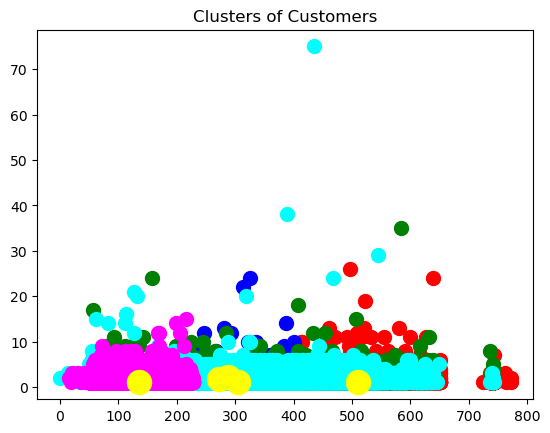

In [98]:
# https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
# Est ce que c'est parcequ'il n'y a pas de transformation des données, ou bien à cause de la fréquence d'achat? 


plt.scatter(X[label==0, 0], X[label==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[label==1, 0], X[label==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[label==2, 0], X[label==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[label==3, 0], X[label==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[label==4, 0], X[label==4, 1], s=100, c='magenta', label ='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('')
plt.ylabel('')
plt.show()